In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [3]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [4]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [11]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Set up oversampling with ADASYN
oversampler = TomekLinks()

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# # Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

Epoch 1/200
31/31 [==============================] - 3s 13ms/step - loss: 0.6553 - accuracy: 0.6168 - val_loss: 0.4080 - val_accuracy: 0.8735
Epoch 2/200
31/31 [==============================] - 0s 5ms/step - loss: 0.3961 - accuracy: 0.8863 - val_loss: 0.3824 - val_accuracy: 0.8735
Epoch 3/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3679 - accuracy: 0.8883 - val_loss: 0.3810 - val_accuracy: 0.8735
Epoch 4/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8893 - val_loss: 0.3790 - val_accuracy: 0.8735
Epoch 5/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8883 - val_loss: 0.3793 - val_accuracy: 0.8735
Epoch 6/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3531 - accuracy: 0.8883 - val_loss: 0.3805 - val_accuracy: 0.8735
Epoch 7/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3513 - accuracy: 0.8883 - val_loss: 0.3795 - val_accuracy: 0.8735
Epoch 8/200


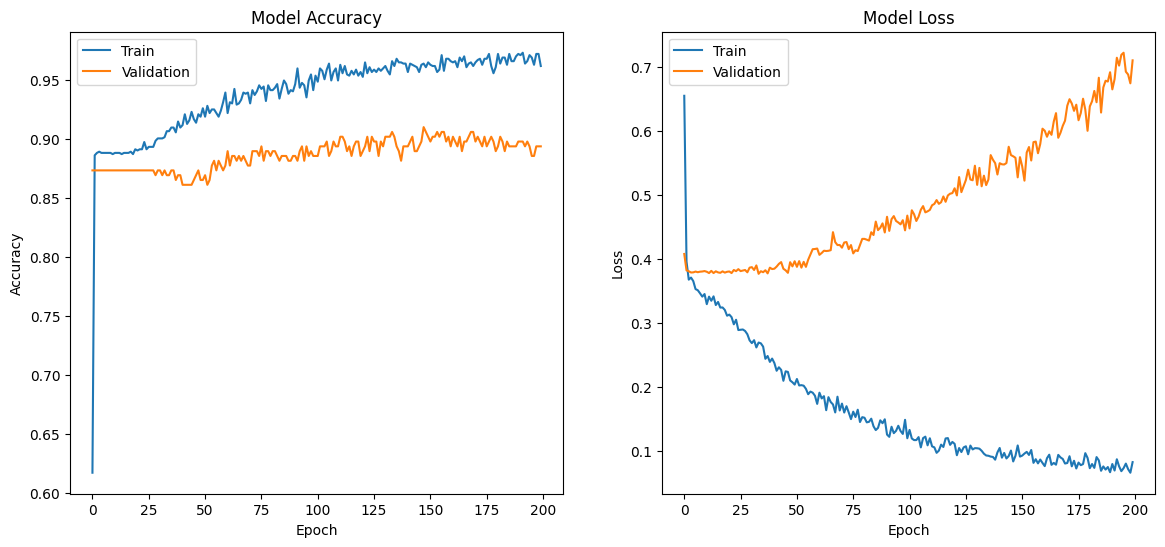

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       275
           1       0.81      0.37      0.51        35

    accuracy                           0.92       310
   macro avg       0.87      0.68      0.73       310
weighted avg       0.91      0.92      0.91       310

Accuracy Score: 0.9193548387096774


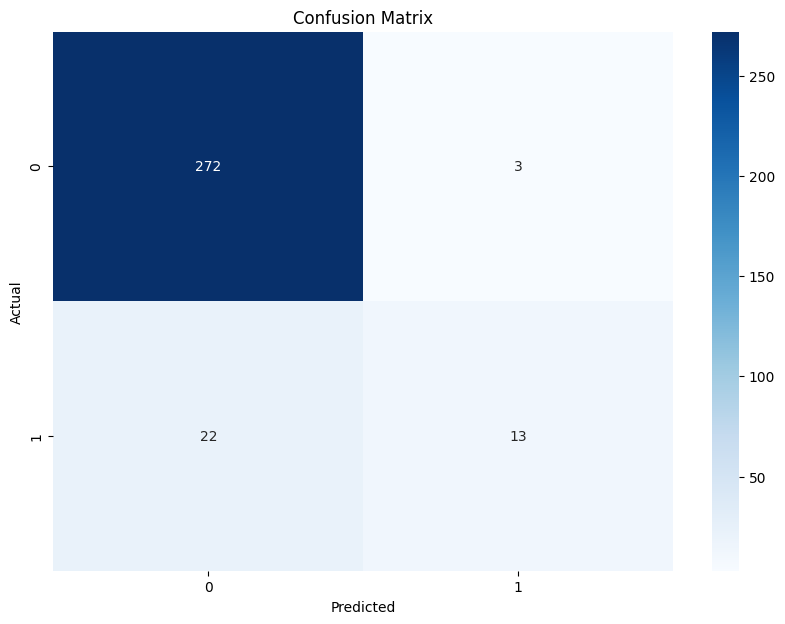

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)
y_pred = (y_pred_probs > 0.5).astype(int)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/200
31/31 [==============================] - 3s 14ms/step - loss: 0.4268 - accuracy: 0.8811 - val_loss: 0.3851 - val_accuracy: 0.8735
Epoch 2/200
31/31 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8873 - val_loss: 0.3803 - val_accuracy: 0.8735
Epoch 3/200
31/31 [==============================] - 0s 6ms/step - loss: 0.3894 - accuracy: 0.8863 - val_loss: 0.3760 - val_accuracy: 0.8735
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 0.3719 - accuracy: 0.8873 - val_loss: 0.3720 - val_accuracy: 0.8735
Epoch 5/200
31/31 [==============================] - 0s 9ms/step - loss: 0.3584 - accuracy: 0.8883 - val_loss: 0.3719 - val_accuracy: 0.8735
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 0.3472 - accuracy: 0.8883 - val_loss: 0.3724 - val_accuracy: 0.8735
Epoch 7/200
31/31 [==============================] - 0s 10ms/step - loss: 0.3444 - accuracy: 0.8883 - val_loss: 0.3740 - val_accuracy: 0.8735
Epoch 8/200

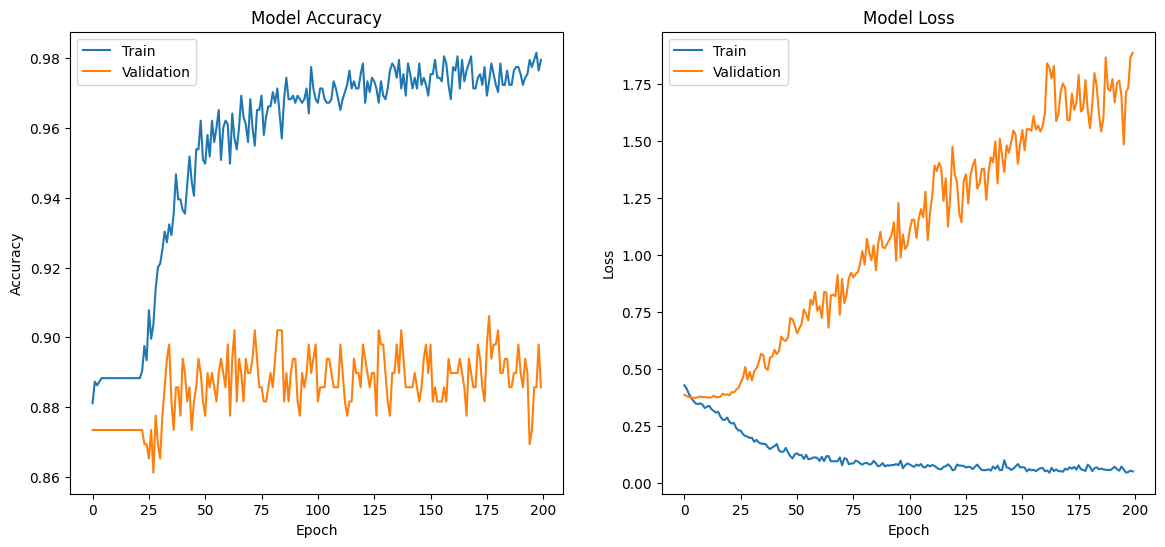

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       275
           1       0.72      0.37      0.49        35

    accuracy                           0.91       310
   macro avg       0.82      0.68      0.72       310
weighted avg       0.90      0.91      0.90       310

Accuracy Score: 0.9129032258064517


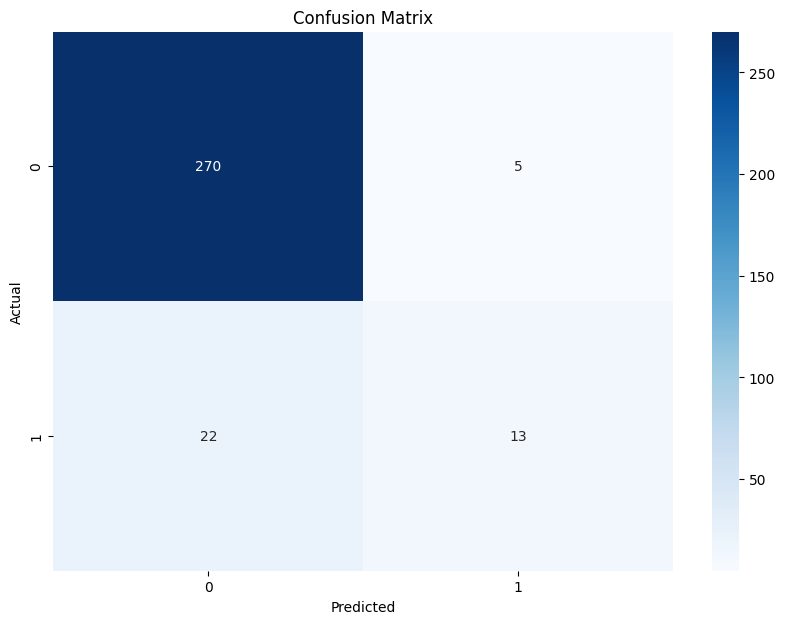

In [17]:

# Define the neural network model with more layers
model = Sequential([
    Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)
y_pred = (y_pred_probs > 0.5).astype(int)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Define the neural network model with class weights
model = Sequential([
    Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)


Epoch 1/200
31/31 [==============================] - 6s 31ms/step - loss: 0.6941 - accuracy: 0.6711 - val_loss: 0.6493 - val_accuracy: 0.7673
Epoch 2/200
31/31 [==============================] - 0s 10ms/step - loss: 0.6862 - accuracy: 0.6219 - val_loss: 0.6824 - val_accuracy: 0.5429
Epoch 3/200
31/31 [==============================] - 0s 12ms/step - loss: 0.6812 - accuracy: 0.6434 - val_loss: 0.6375 - val_accuracy: 0.7020
Epoch 4/200
31/31 [==============================] - 0s 11ms/step - loss: 0.6781 - accuracy: 0.6670 - val_loss: 0.6484 - val_accuracy: 0.6898
Epoch 5/200
31/31 [==============================] - 0s 12ms/step - loss: 0.6837 - accuracy: 0.6076 - val_loss: 0.6725 - val_accuracy: 0.6000
Epoch 6/200
31/31 [==============================] - 0s 11ms/step - loss: 0.7009 - accuracy: 0.4703 - val_loss: 0.6897 - val_accuracy: 0.5429
Epoch 7/200
31/31 [==============================] - 0s 11ms/step - loss: 0.6772 - accuracy: 0.5184 - val_loss: 0.6829 - val_accuracy: 0.5755
Epoch 

10/10 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       275
           1       0.36      0.46      0.41        35

    accuracy                           0.85       310
   macro avg       0.65      0.68      0.66       310
weighted avg       0.86      0.85      0.86       310



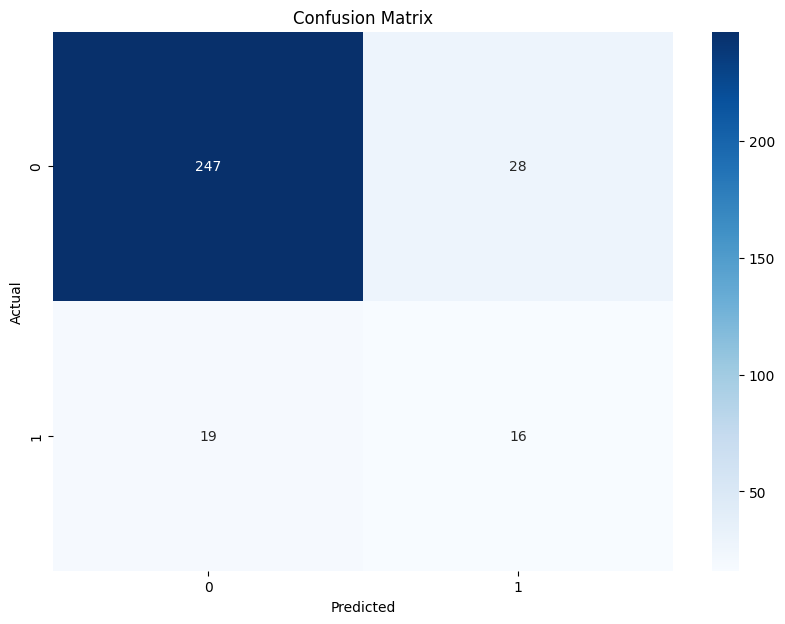

In [21]:
# Predict probabilities
y_pred_probs = model.predict(X_test_processed)

# Adjust the threshold
threshold = 0.05  # Lowering threshold from 0.5 to 0.3
y_pred = (y_pred_probs > threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/300
31/31 [==============================] - 3s 15ms/step - loss: 0.6980 - accuracy: 0.3924 - val_loss: 0.6650 - val_accuracy: 0.7469
Epoch 2/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5451 - val_loss: 0.6647 - val_accuracy: 0.7592
Epoch 3/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5348 - val_loss: 0.6363 - val_accuracy: 0.7673
Epoch 4/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.6014 - val_loss: 0.6470 - val_accuracy: 0.7714
Epoch 5/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6785 - accuracy: 0.5533 - val_loss: 0.6363 - val_accuracy: 0.7633
Epoch 6/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6755 - accuracy: 0.6475 - val_loss: 0.6382 - val_accuracy: 0.7265
Epoch 7/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.5553 - val_loss: 0.6138 - val_accuracy: 0.7592
Epoch 8/300


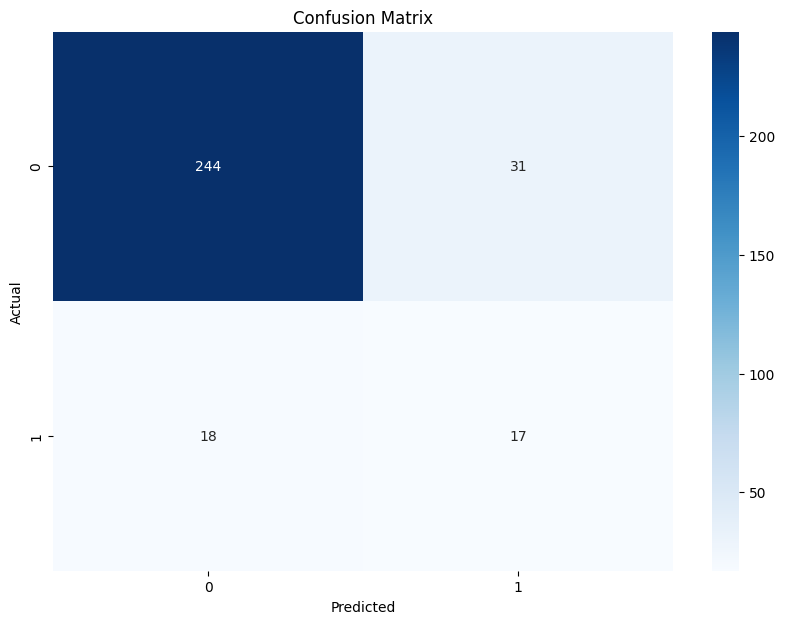

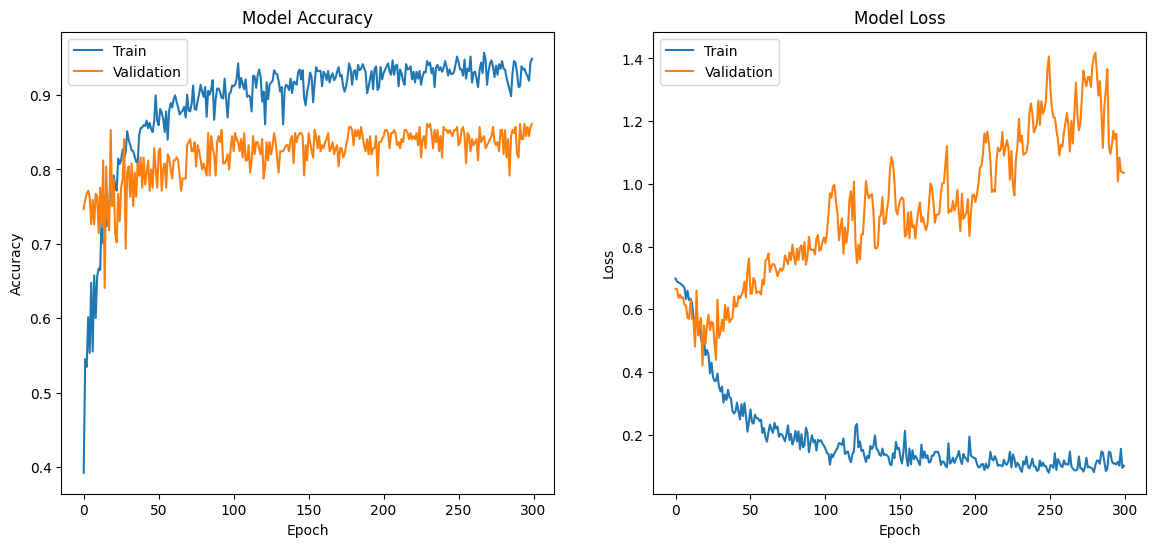

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Adjust the threshold
threshold = 0.05  # Fine-tune this threshold based on performance
y_pred = (y_pred_probs > threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


NameError: name 'class_weights_dict' is not defined

Epoch 1/300
31/31 [==============================] - 5s 31ms/step - loss: 0.7304 - accuracy: 0.4898 - val_loss: 0.6689 - val_accuracy: 0.6789
Epoch 2/300
31/31 [==============================] - 0s 15ms/step - loss: 0.7126 - accuracy: 0.5276 - val_loss: 0.6657 - val_accuracy: 0.7317
Epoch 3/300
31/31 [==============================] - 1s 20ms/step - loss: 0.7270 - accuracy: 0.4541 - val_loss: 0.6841 - val_accuracy: 0.6545
Epoch 4/300
31/31 [==============================] - 1s 24ms/step - loss: 0.7128 - accuracy: 0.3949 - val_loss: 0.7294 - val_accuracy: 0.3333
Epoch 5/300
31/31 [==============================] - 1s 17ms/step - loss: 0.7144 - accuracy: 0.4010 - val_loss: 0.6732 - val_accuracy: 0.6789
Epoch 6/300
31/31 [==============================] - 0s 14ms/step - loss: 0.6905 - accuracy: 0.4806 - val_loss: 0.6925 - val_accuracy: 0.5203
Epoch 7/300
31/31 [==============================] - 0s 11ms/step - loss: 0.6983 - accuracy: 0.5694 - val_loss: 0.6444 - val_accuracy: 0.7236
Epoch 

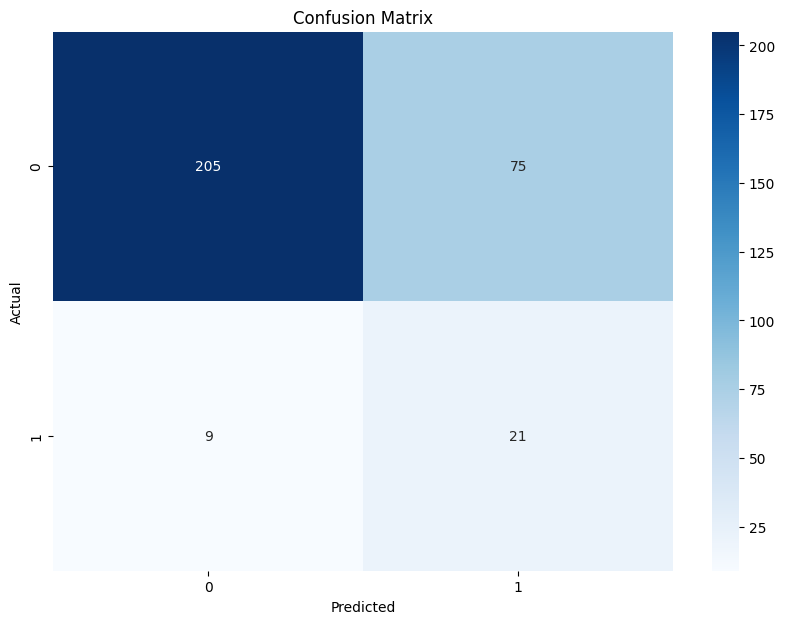

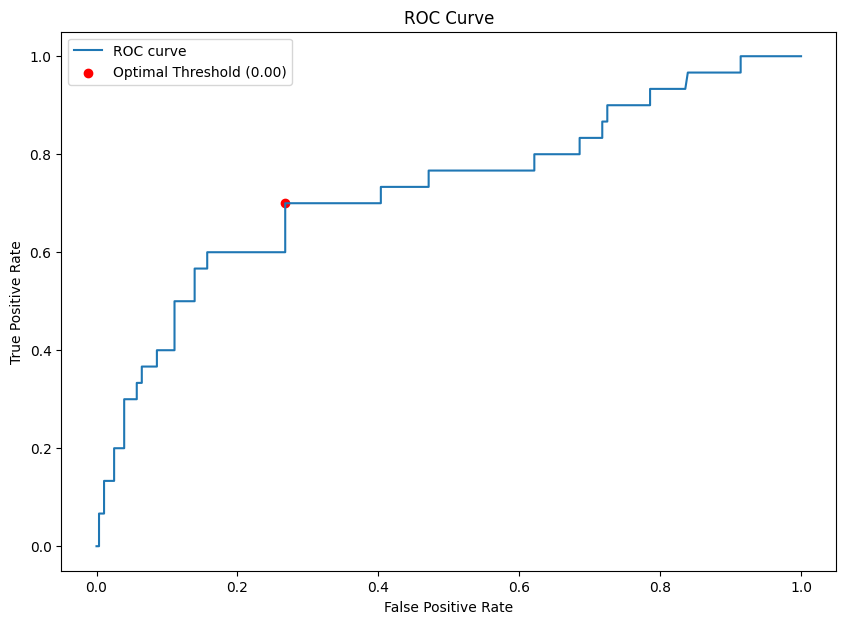

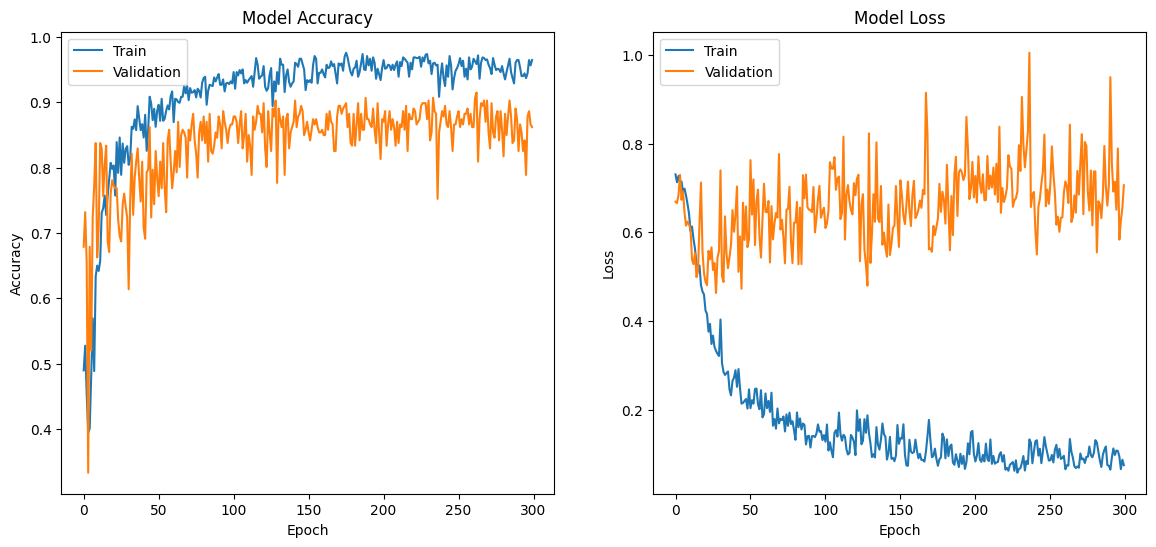

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
